In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from google.colab import files
import plotly.graph_objects as go
import ast

In [2]:
archivo_datos = files.upload()

Saving Conformación de los Grupos Económicos y su Comportamiento Tributario (4).xlsx to Conformación de los Grupos Económicos y su Comportamiento Tributario (4).xlsx


In [12]:
df = pd.read_excel("Conformación de los Grupos Económicos y su Comportamiento Tributario (4).xlsx", sheet_name="RESUMEN DE GRUPOS ECONÓMICO", header=4 )
df.to_csv (r'datos.csv', index = None, header=True)

In [131]:
df = pd.read_csv('datos.csv', encoding= 'utf-8')
df =df.rename(columns={df.columns[2]: 'Movimiento Ranking', df.columns[4]: 'Empresa', df.columns[7]: 'Panama Papers', df.columns[20]: 'Impuesto a la renta',  df.columns[21]: 'Patrimonio'})
df.head(2)

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Movimiento Ranking,NUEVO\nGE,Empresa,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),Panama Papers,Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3.0,1.0,...,221893.35,3509949.0,3577970.0,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,588975950.0,667872172.0,NaN
1,2,2.0,0.0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45.0,42.0,17.0,19.0,...,4339679.14,796827.0,945874.0,6.417335e+09,6.436091e+09,1.878733e+09,1.955377e+09,127087663.0,190328750.0,NaN


In [132]:
#Recoger columnas que tengan una variacion en la columna de ranking
df["Empresa"] = df['Empresa'].str.slice(0,15)

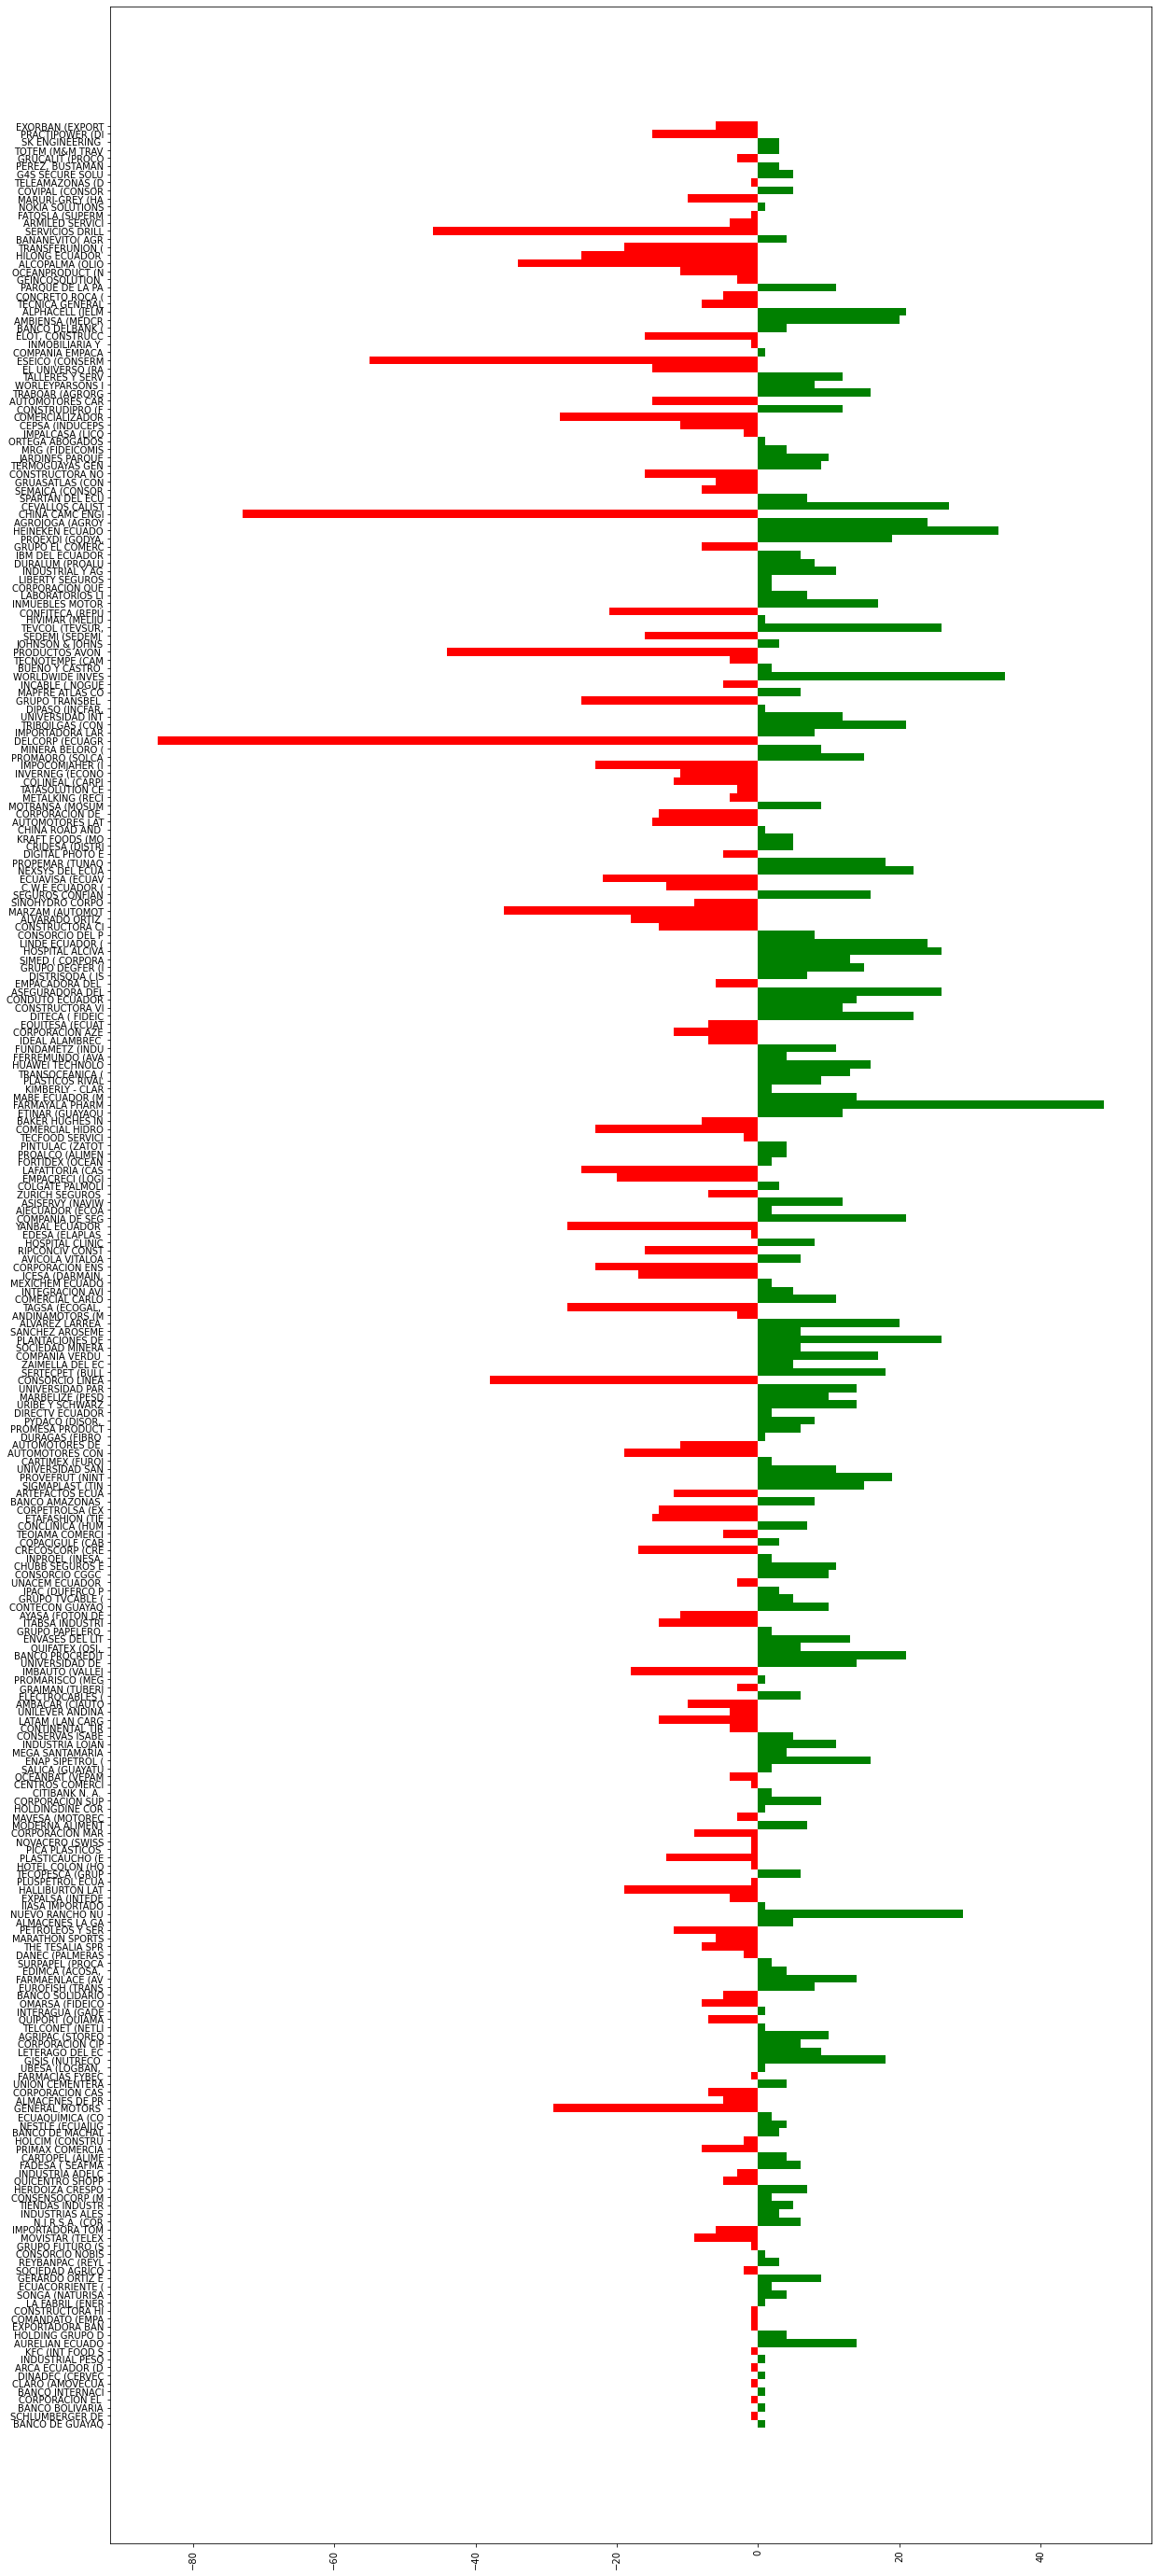

In [79]:
#Generar gráfico de barras de solo las empresas que han mejorado y/o
#empeorado su ranking con respecto al año anterior.

dfp1 = df.loc[df['Movimiento Ranking'] != 0.0,]
d = dfp1.loc[:,["Movimiento Ranking","Empresa"]]
d = d.dropna()
etiquetas = d.loc[:,"Empresa"]
valores = d.loc[:,"Movimiento Ranking"].astype(int)

#Grafico de Barras
#valores = np.arange(1,4,1)
cc=['colors']*len(valores)
for n,val in enumerate(valores):
    if val<0:
        cc[n]='red'
    if val>=0:
        cc[n]='green'

plt.figure(figsize=(20,50))
plt.xticks(rotation = 90)
barras = plt.barh(etiquetas, valores, height=1, color = cc)

plt.show()  

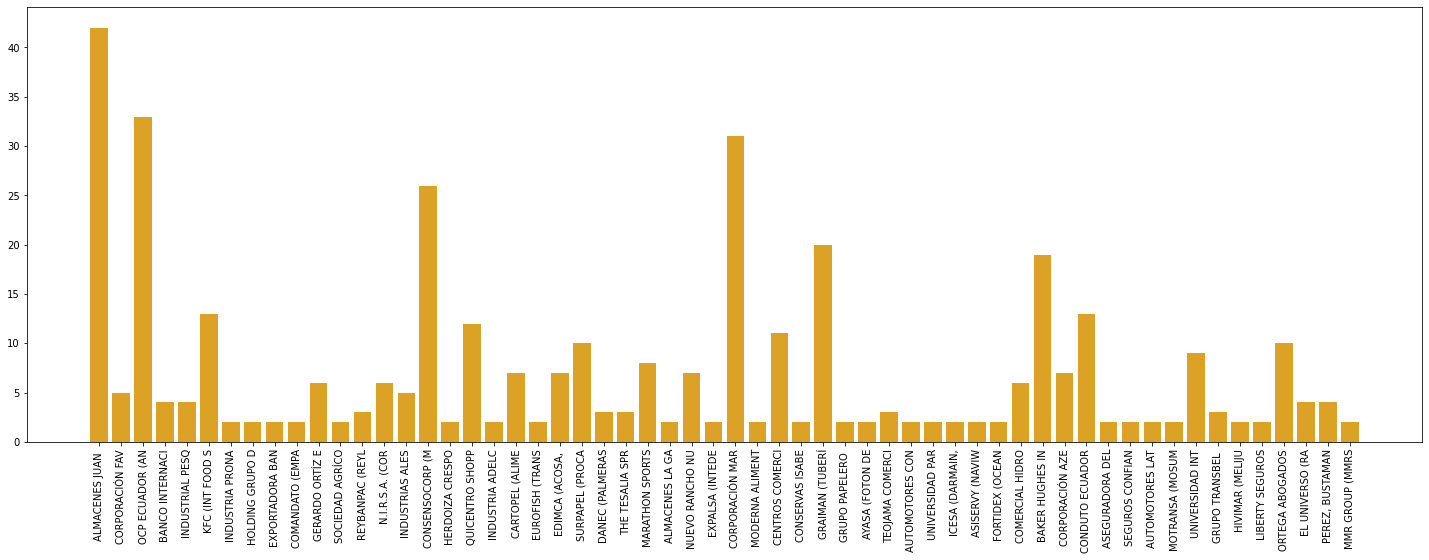

In [92]:
#Generar gráfico de las empresas que tienen panamá papers.
dfp2 = df.loc[df['Panama Papers'] != 0.0,]
d = dfp2.loc[:,["Panama Papers","Empresa"]]
d.head(5)
d = d.dropna()
d=d[:-1]
etiquetas = d.loc[:,"Empresa"]
valores = d.loc[:,"Panama Papers"].astype(int)

plt.figure(figsize=(25,8))
plt.xticks(rotation = 90)
barras = plt.bar(etiquetas, valores, color = "#dba225")

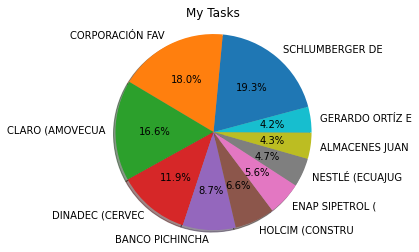

In [133]:
#Generar un pie de las empresas que más aportan a la economía del país.
df2 =df
df2.drop([303], axis=0, inplace=True)
dfp4 = df2.nlargest(n=10, columns=['Impuesto a la renta'])
d = dfp4.loc[:,["Impuesto a la renta","Empresa"]]
etiquetas = d.loc[:,"Empresa"]
valores = d.loc[:,"Impuesto a la renta"].astype(int)

plt.pie(valores,labels=etiquetas,autopct='%1.1f%%',startangle=15, shadow = True)
plt.title('My Tasks')
plt.axis('equal')
plt.show()

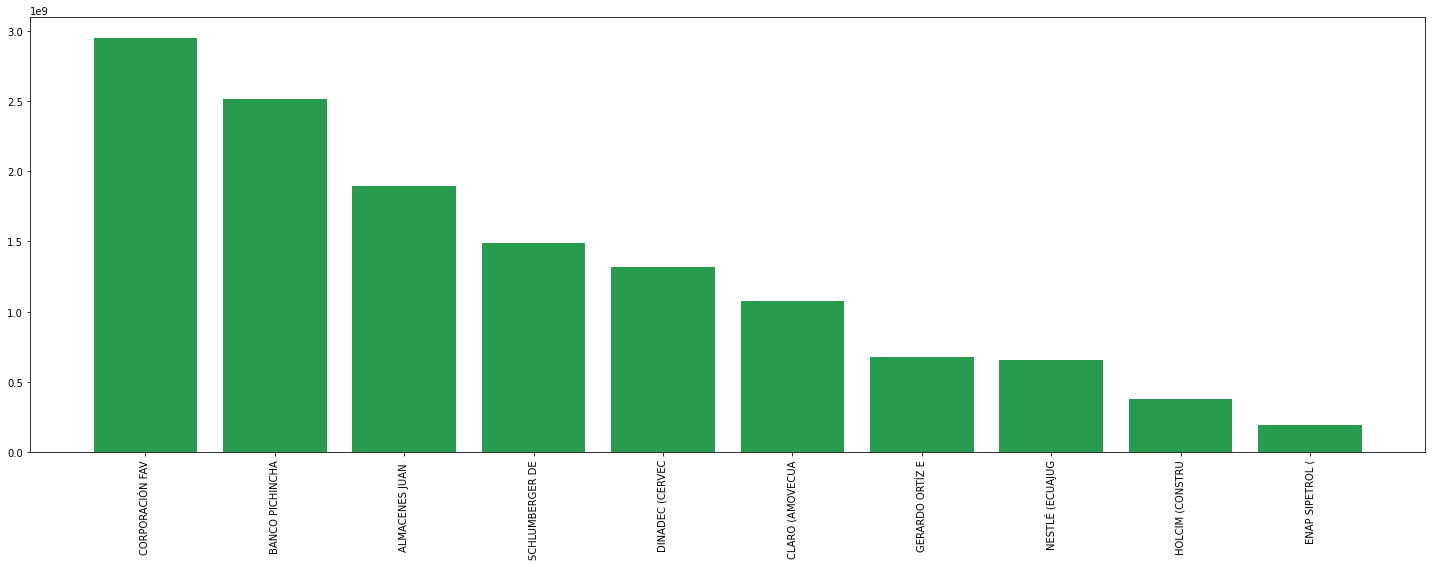

In [138]:
#Obtener las empresas que mayor patrimonio tienen (10).
dfp5 = df2.nlargest(n=10, columns=['Patrimonio'])
d = dfp4.loc[:,["Patrimonio","Empresa"]]
d = d.sort_values(by="Patrimonio", ascending=False) 
etiquetas = d.loc[:,"Empresa"]
valores = d.loc[:,"Patrimonio"].astype(int)

plt.figure(figsize=(25,8))
plt.xticks(rotation = 90)
barras = plt.bar(etiquetas, valores, color = "#279c4e")

#Conlusiones
Gracias a los graficos realizados podemos constatar varias cosas. Dentro de las cuales la empresa que bajo mas de ranking este año fue DelCorp. La empresa con mas cuentas offshore en panama papers es Almacenes Juan Eljuri. La empresa que mas influencia tuvo en la economia del pais fue SCHLUMBERGER y la que mas recolecto patrimonio, igualmente La Favorita.